# REDES NEURONALES (Perceptrón Multi Capa - MLP)

En esta sección se desarrollarán los modelos de ML MLP para comparar la predicción de la matrícula

In [ ]:
########## LIBRERÍAS A UTILIZAR ##########
#Se importan la librerias a utilizar
import pandas as pd
from sklearn import datasets
import numpy as np
from collections import Counter
from imblearn.datasets import make_imbalance
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 5 MODELADO

    En esta sección se desarrollará el modelo de ML predicción de la matrícula

In [ ]:
########## LIBRERÍAS A UTILIZAR ##########
#Se importan la librerias a utilizar
import pandas as pd
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree # Árboles de decisión
import sklearn.ensemble # Ensambles de modelos
import sklearn.model_selection
import sklearn.decomposition # Módulo donde encontramos el análisis de componentes principales
from sklearn import datasets
from collections import Counter

# 5.1 Definición de Funciones

In [ ]:
##########DEFINICIÓN DE FUNCIONES #####
def calcula_metricas(nombre_algoritmo,y_test,y_pred):
### CLASE POSITIVA (1) ###
    #Calculo la precisión del modelo
    from sklearn.metrics import precision_score
    precision = precision_score(y_test, y_pred)

    #Calculo la exactitud del modelo
    from sklearn.metrics import accuracy_score
    exactitud = accuracy_score(y_test, y_pred)

    #Calculo la sensibilidad del modelo
    from sklearn.metrics import recall_score
    sensibilidad = recall_score(y_test, y_pred)

    #Calculo el Puntaje F1 del modelo
    from sklearn.metrics import f1_score
    puntajef1 = f1_score(y_test, y_pred)

    #Calculo la curva ROC - AUC del modelo
    from sklearn.metrics import roc_auc_score
    roc_auc = roc_auc_score(y_test, y_pred)

### CLASE NEGATIVA (0) ###
    from sklearn.metrics import confusion_matrix
    labels = [1, 0]
    cm = confusion_matrix(y_test, y_pred, labels = labels)
    tp,fn,fp,tn = cm.ravel()
    
    #True Negative Rate / specificity
    TNR_recall_espec = round(tn/(tn+fp),6)
    
    #Negative Predictive Value
    NPV_precision = round(tn/(tn+fn),6)
   
    #Cálculo del F1 para la clase negativa
    F1_neg = round(2 * (NPV_precision * TNR_recall_espec) / (NPV_precision + TNR_recall_espec),2)
   
    ## Vector de Desempeño - Resumen de Métricas del Modelo
    df_1 = pd.DataFrame({'Modelo': [nombre_algoritmo],'Clase ':[1],'Exactitud': [exactitud],'Precisión': [precision], 
                   'Sensibilidad': [sensibilidad], 'F1': [puntajef1],'AUC': [roc_auc]})
    df_2 = pd.DataFrame({'Modelo': '','Clase ':[0],'Exactitud': '','Precisión': [NPV_precision], 
                   'Sensibilidad': [TNR_recall_espec], 'F1': [F1_neg],'AUC': ''})
    df = df_1.append(df_2, ignore_index = True)
    
    return df.style.hide_index()

In [ ]:
def matriz_confusion(y_test,y_pred):
    import matplotlib.pyplot as plt
    import seaborn as sns
    #Verifico la matriz de Confusión
    from sklearn.metrics import confusion_matrix
    matriz = confusion_matrix(y_test, y_pred,labels=[1, 0])

    ax = sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Matriz de Confusión\n\n');
    ax.set_xlabel('\nPredicción')
    ax.set_ylabel('Real ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['True','False'])
    ax.yaxis.set_ticklabels(['True','False'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [ ]:
def importancia_variables(algoritmo, nombre_algoritmo):
    import matplotlib.pyplot as plt
    Importance = pd.DataFrame({'Importance':algoritmo.feature_importances_*100}, 
                          index = cols)


    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'steelblue', )
    plt.suptitle('Importancia de Variables')
    plt.title(nombre_algoritmo)

    plt.gca().legend_ = None

# 5.2 Carga de datos

In [ ]:
#Carga de datos depurados
data = pd.read_excel("postulaciones_depurado.xlsx")
df2 = data.groupby(['ESTADO'])['ESTADO'].count()
df2

ESTADO
0    13365
1     3286
Name: ESTADO, dtype: int64

In [ ]:
# Separar las variables dependientes de la independientes
y = data['ESTADO']
X = data.drop(['ESTADO','PERIODO','IDPOS','PACE'], axis = 1)

#Captura los nombres de las variables independientes
cols = X.columns

#Cuenta la cantidad de registros por cada clase
Counter(y)

Counter({0: 13365, 1: 3286})

## 5.2.1 UndeSampling

In [1]:
#pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Create a folder to fetch the dataset
RANDOM_STATE=0
X, y = make_imbalance(
    data.drop(['ESTADO'], axis = 1),
    data['ESTADO'],
    sampling_strategy={0:3286},
    random_state=RANDOM_STATE,
)

NameError: ignored

In [ ]:
Counter(y)

Counter({0: 3286, 1: 3286})

# 5.3 Escalamientos de datos

In [ ]:
#Se escalan todos los datos
from sklearn.preprocessing import MinMaxScaler
escalar = MinMaxScaler()
X = escalar.fit_transform(X)

# 5.4 Separación de datos Train/Test

In [ ]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
#Cuenta la cantidad de registros por cada clase del set de entrenamiento
Counter(y_train)

Counter({1: 2633, 0: 2624})

# 5.5 Perceptrón MultiCapa

En esta sección se aplicará el entrenamiento y evaluación modelo MLPClassifier para la predicción de la matrícula

### Evaluación del modelo MLP Classifier

In [ ]:
#Perceptrón Multicapa MLP (neuronas, capas) #hidden_layer_sizes=(100,100,100), 
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=0,hidden_layer_sizes=(100,))

In [ ]:
#Entreno el modelo
mlp_clf.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [ ]:
#Realizo una predicción
y_pred = mlp_clf.predict(X_test)

In [ ]:
df = pd.DataFrame({'Predicción': y_pred, 'Real': y_test})
df.head(10)

,Predicción,Real
6175,1,1
6085,1,1
5357,1,1
4472,1,1
4426,1,1
5646,0,1
5453,1,1
495,0,0
3176,1,0
1453,0,0


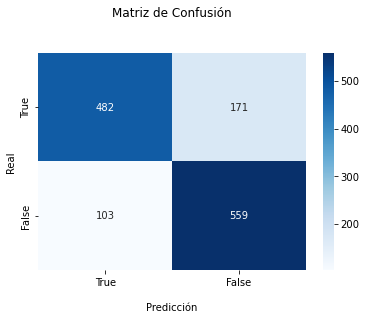

In [ ]:
#Calcula y despliega la matriz de confusión
matriz_confusion(y_test,y_pred)

In [ ]:
#Obtiene las métricas del modelo
df_metricas_mlp = calcula_metricas('MLP',y_test,y_pred)
df_metricas_mlp

Modelo,Clase,Exactitud,Precisión,Sensibilidad,F1,AUC
MLP,1,0.791635,0.823932,0.738132,0.778675,0.791271
,0,,0.765753,0.844411,0.800000,
